In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# heart.csv has 1025 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Heart.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Heart.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 303 rows and 15 columns


In [7]:
df1.head(5)

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [8]:
plotPerColumnDistribution(df1, 10, 5)

ValueError: Number of rows must be a positive integer, not 3.0

<Figure size 2400x1920 with 0 Axes>

In [8]:
plotCorrelationMatrix(df1, 8)

NameError: name 'df1' is not defined

In [ ]:
plotScatterMatrix(df1, 20, 10)

There are 303 rows and 15 columns

Menu:
1. Show Column Distribution
2. Show Correlation Matrix
3. Show Scatter and Density Plot
4. Exit
Enter your choice (1-4): 1


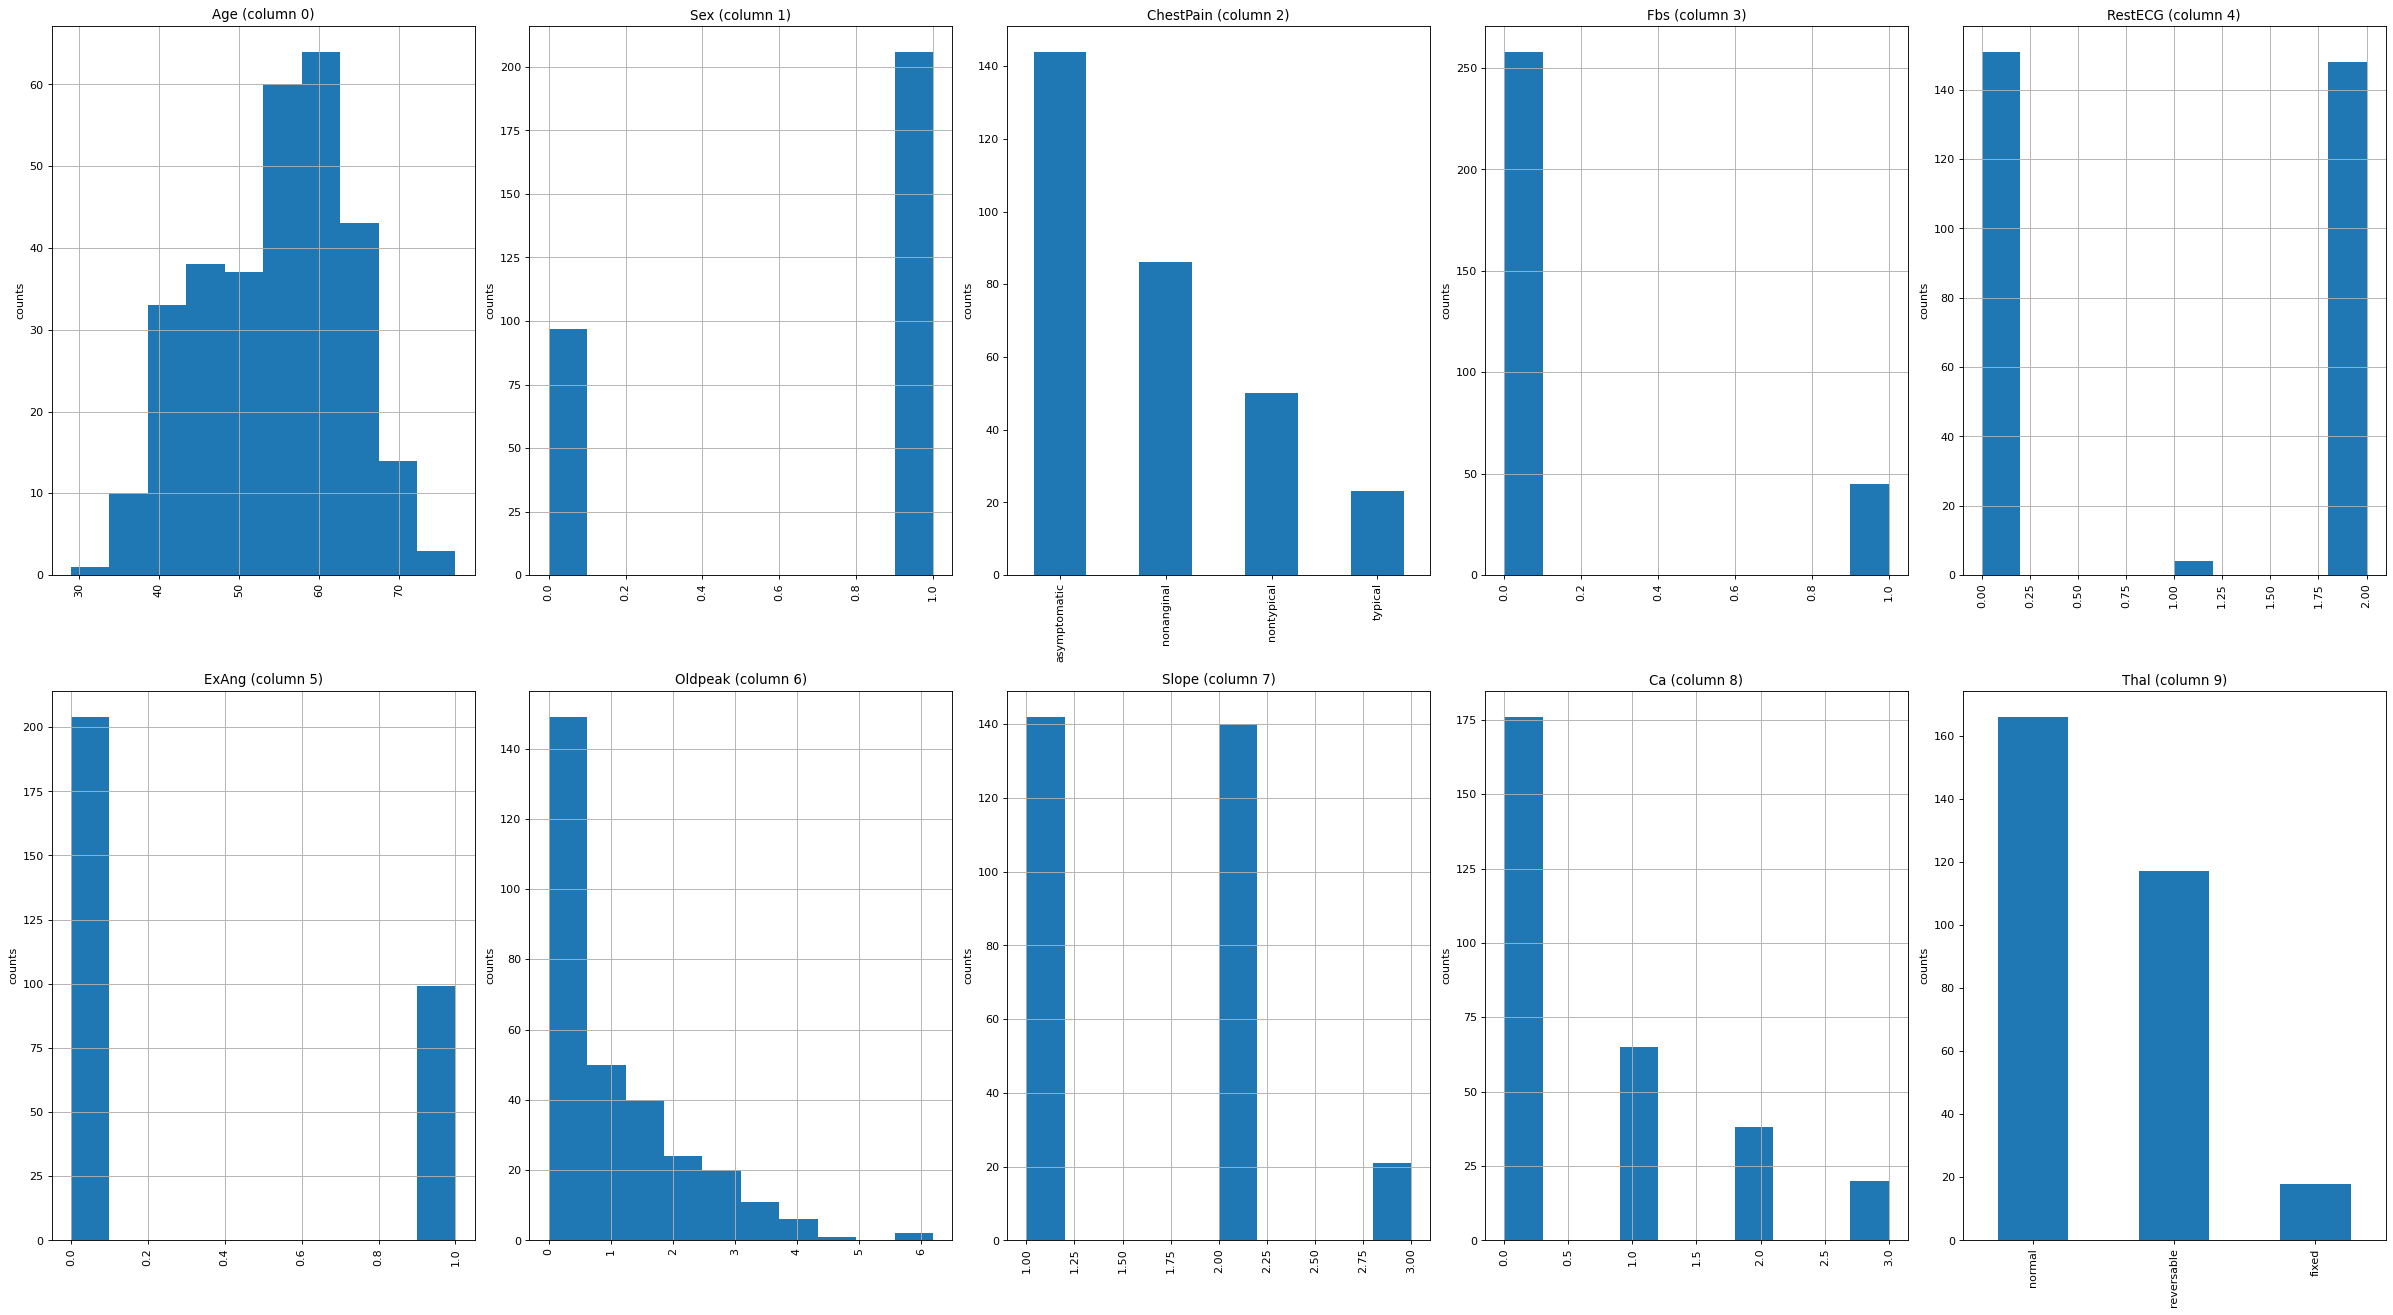


Menu:
1. Show Column Distribution
2. Show Correlation Matrix
3. Show Scatter and Density Plot
4. Exit
Enter your choice (1-4): 2


C:\Users\Abdul Hanan\AppData\Local\Temp\ipykernel_17396\1707943257.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
C:\Users\Abdul Hanan\AppData\Local\Temp\ipykernel_17396\1707943257.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


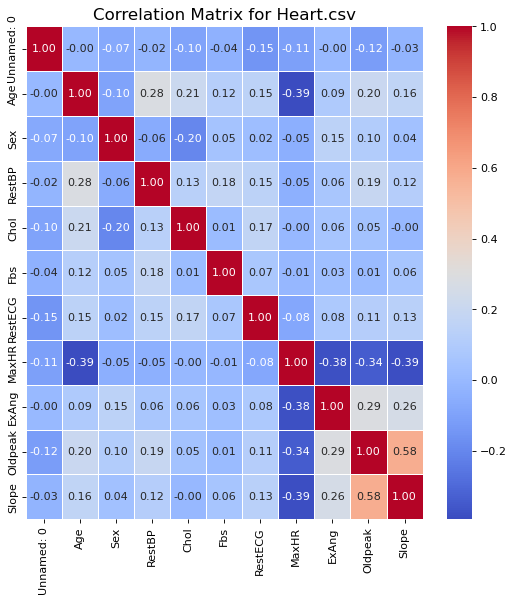


Menu:
1. Show Column Distribution
2. Show Correlation Matrix
3. Show Scatter and Density Plot
4. Exit
Enter your choice (1-4): 3


C:\Users\Abdul Hanan\AppData\Local\Temp\ipykernel_17396\1707943257.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


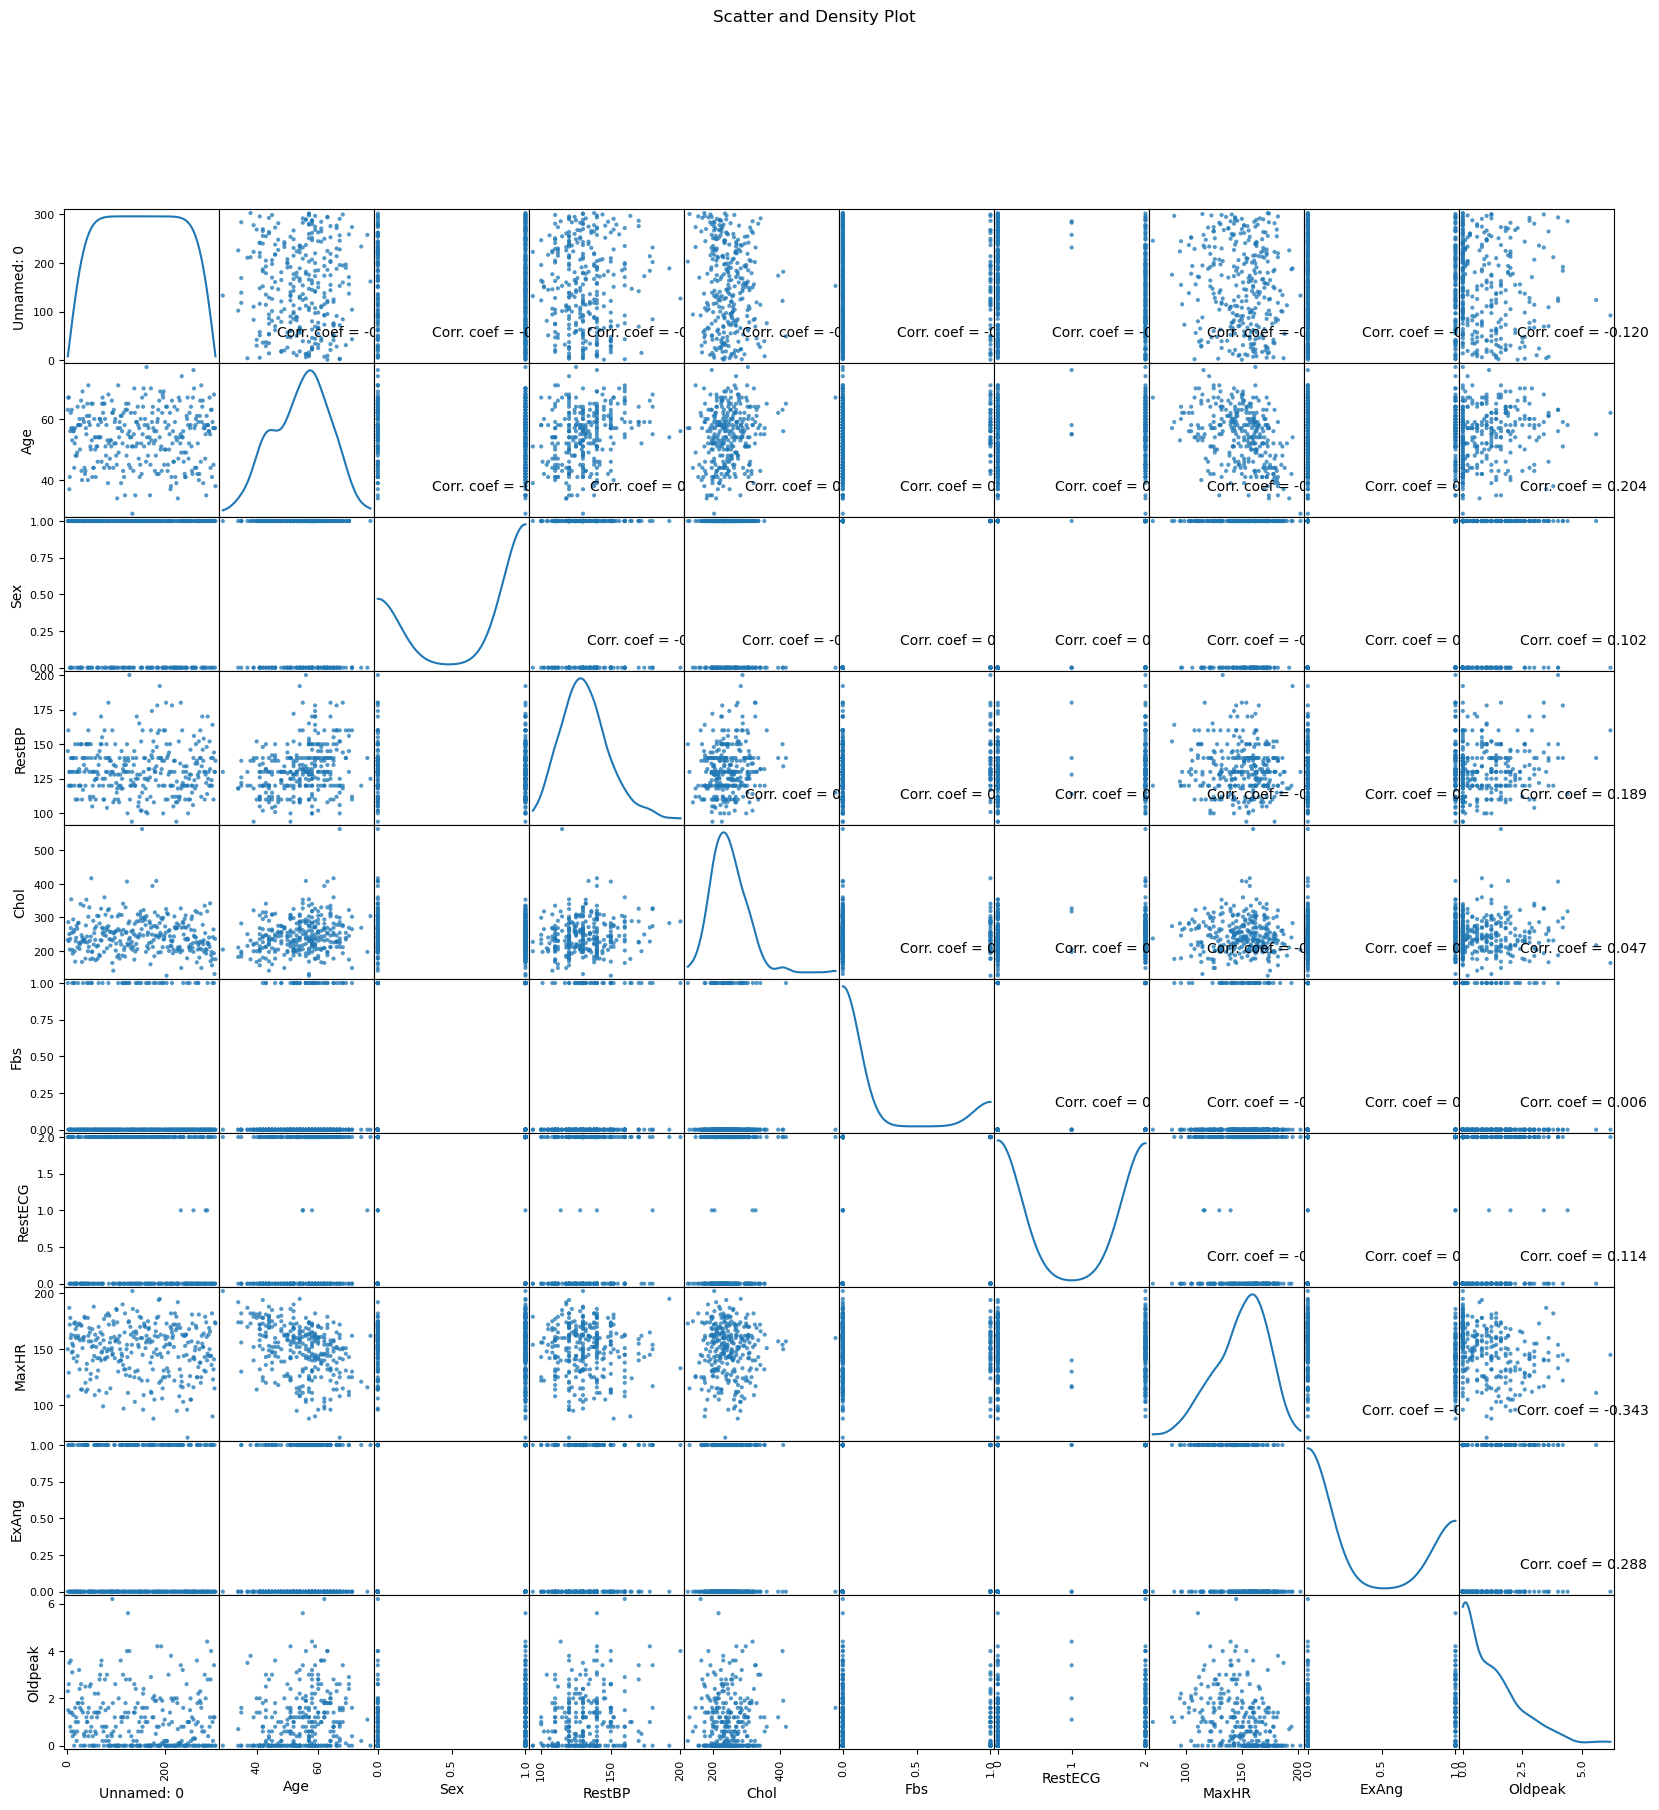


Menu:
1. Show Column Distribution
2. Show Correlation Matrix
3. Show Scatter and Density Plot
4. Exit
Enter your choice (1-4): 4
Allah dye Hawallaye!


In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return   
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)   
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center',
                          va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

def main():
    nRowsRead = 1000
    df = pd.read_csv('Heart.csv', delimiter=',', nrows=nRowsRead)
    df.dataframeName = 'Heart.csv'
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns')

    while True:
        print("\nMenu:")
        print("1. Show Column Distribution")
        print("2. Show Correlation Matrix")
        print("3. Show Scatter and Density Plot")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == "1":
            plotPerColumnDistribution(df, 10, 5)
        elif choice == "2":
            plotCorrelationMatrix(df, 8)
        elif choice == "3":
            plotScatterMatrix(df, 20, 10)
        elif choice == "4":
            print("Allah dye Hawallaye!")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 4.")

if __name__ == "__main__":
    main()

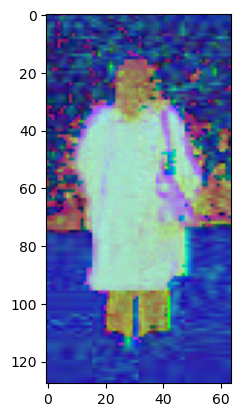

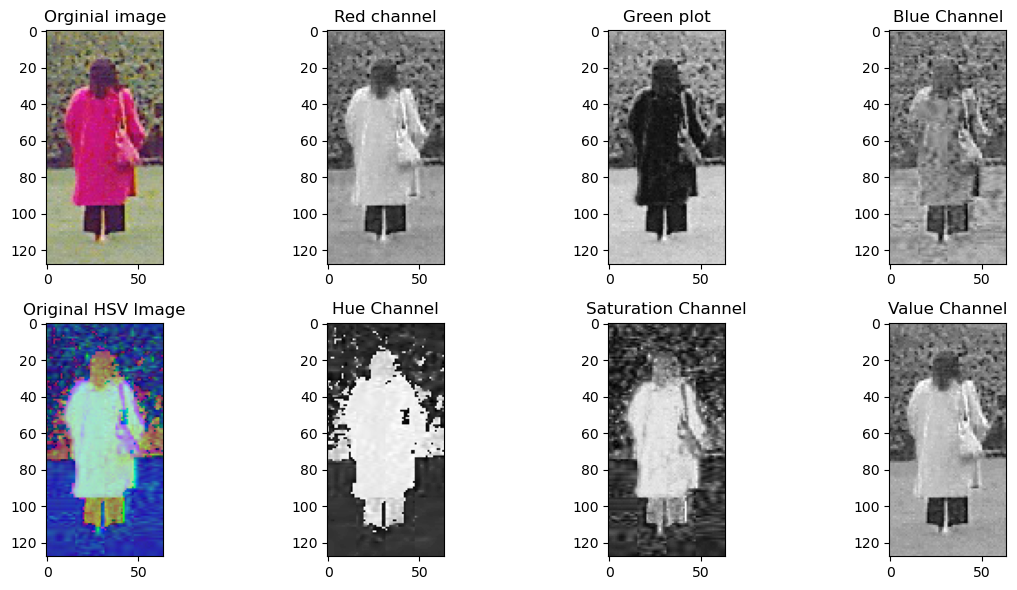

In [19]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("test.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
r_channel,g_channel,b_channel=cv2.split(img_rgb)
h_channel,s_channel,v_channel=cv2.split(img_hsv)
plt.figure(figsize=(12,6))
plt.subplot(2,4,1)
plt.imshow(img_rgb)
plt.title("Orginial image")
plt.subplot(2,4,2)
plt.imshow(r_channel,cmap='gray')
plt.title('Red channel')
plt.subplot(2,4,3)
plt.imshow(g_channel,cmap='gray')
plt.title('Green plot')
plt.subplot(2, 4, 4)
plt.imshow(b_channel, cmap='gray')
plt.title('Blue Channel')

# Plotting the original HSV image
plt.subplot(2, 4, 5)
plt.imshow(img_hsv)
plt.title('Original HSV Image')

# Plotting the individual channels of HSV
plt.subplot(2, 4, 6)
plt.imshow(h_channel, cmap='gray')
plt.title('Hue Channel')

plt.subplot(2, 4, 7)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')

plt.subplot(2, 4, 8)
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')
plt.tight_layout()
plt.show()

AttributeError: module 'cv2' has no attribute 'merged_hsv'

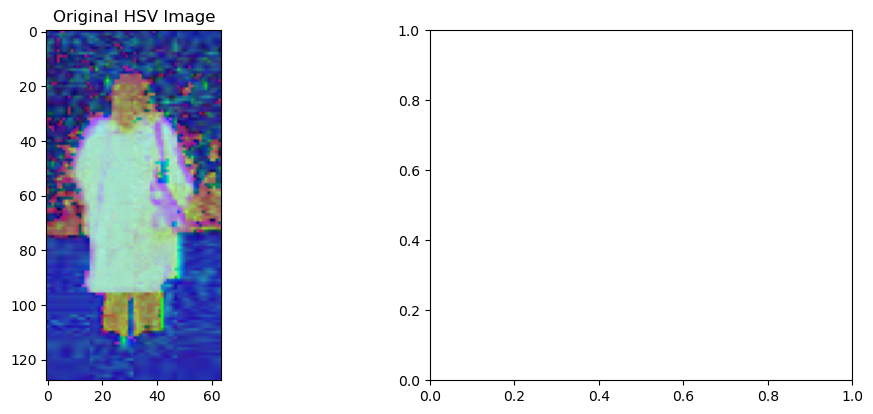

In [25]:

plt.figure(figsize=(12,10))
plt.subplot(2, 2, 3)
plt.imshow(img_hsv)
plt.title('Original HSV Image')

# Merged HSV image
plt.subplot(2, 2, 4)
plt.imshow(cv2.merged_hsv)
plt.title('Merged HSV Image')

plt.tight_layout()
plt.show()

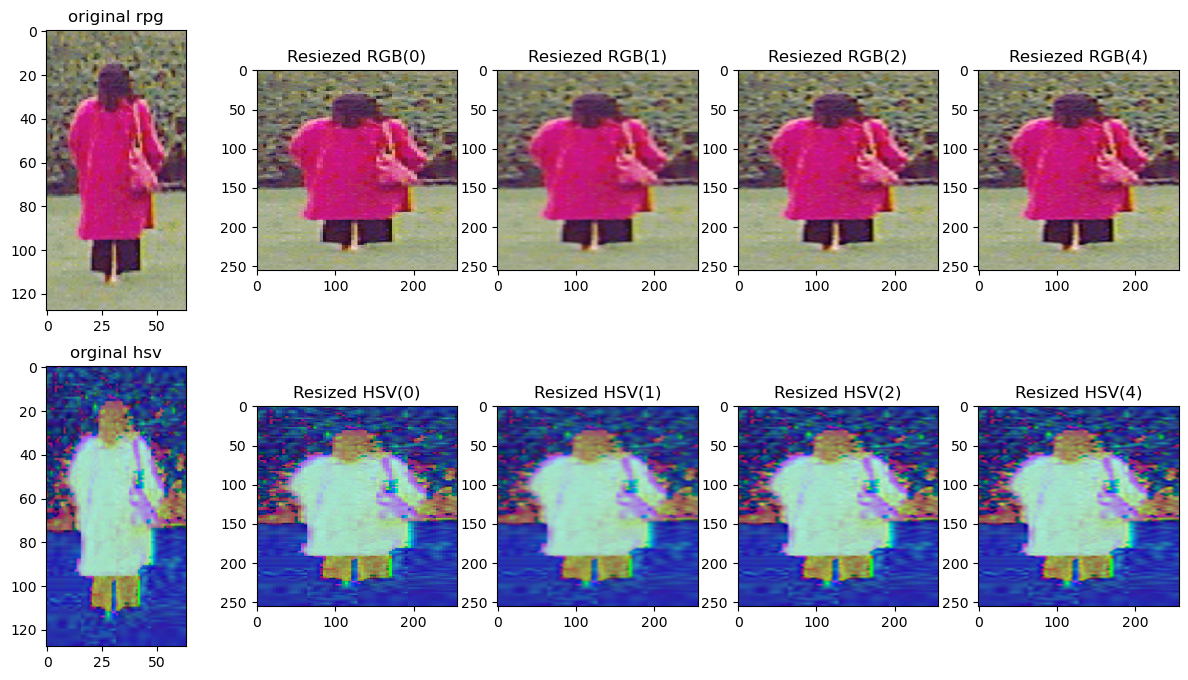

In [47]:
from cv2 import*
import matplotlib.pyplot as plt
img=cv2.imread("test.jpg")
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
suggested_size_rgb=(256,256)
suggested_size_hsv=(256,256)
resize_methods=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
resized_images_rgb=[]
resized_images_hsv=[]
plt.figure(figsize=(15,8))
plt.subplot(2,5,1)
plt.imshow(img_rgb)
plt.title("original rpg")
plt.subplot(2,5,6)
plt.imshow(img_hsv)
plt.title("orginal hsv")
for i,method in enumerate(resize_methods,start=2):
    resized_rgb=cv2.resize(rgb_img,suggested_size_rgb,interpolation=method)
    #resized_images_rgb.append((f'Resized RGB({method}),resized_rgb'))
    plt.subplot(2,5,i)
    plt.imshow(resized_rgb)
    plt.title(f"Resiezed RGB({method})")
for i,method in enumerate(resize_methods,start=7):
    resized_img=cv2.resize(img_hsv,suggested_size_hsv,interpolation=method)
    #resized_images_hsv.append((f"Resized HSV({method}),resized_rgb"))
    plt.subplot(2,5,i)
    plt.imshow(resized_img)
    plt.title(f"Resized HSV({method})")


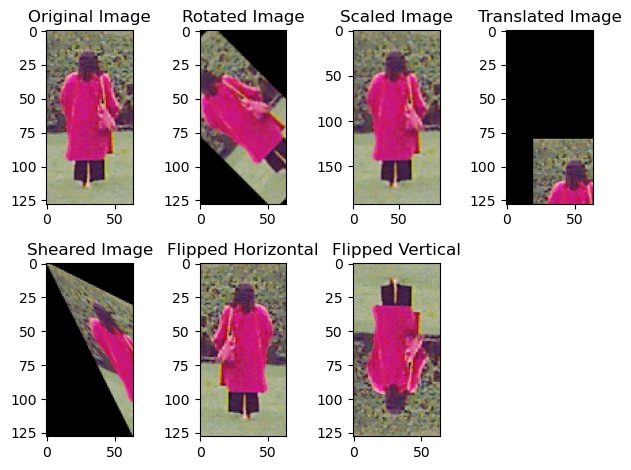

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read an RGB image
img = cv2.imread("test.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
angle = 45
scale_factor = 1.5
translation_matrix = np.float32([[1, 0, 20], [0, 1, 80]])
shear_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])

# Rotation
img_rotated = cv2.warpAffine(img_rgb, cv2.getRotationMatrix2D((img_rgb.shape[1] // 2, img_rgb.shape[0] // 2), angle, 1),
                              (img_rgb.shape[1], img_rgb.shape[0]))

# Scaling
img_scaled = cv2.resize(img_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Translation
img_translated = cv2.warpAffine(img_rgb, translation_matrix, (img_rgb.shape[1], img_rgb.shape[0]))

# Shearing
img_sheared = cv2.warpAffine(img_rgb, shear_matrix, (img_rgb.shape[1], img_rgb.shape[0]))

# Flipping
img_flipped_horizontal = cv2.flip(img_rgb, 1)
img_flipped_vertical = cv2.flip(img_rgb, 0)

# Plotting
plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(img_rotated)
plt.title('Rotated Image')

plt.subplot(2, 4, 3)
plt.imshow(img_scaled)
plt.title('Scaled Image')

plt.subplot(2, 4, 4)
plt.imshow(img_translated)
plt.title('Translated Image')

plt.subplot(2, 4, 5)
plt.imshow(img_sheared)
plt.title('Sheared Image')

plt.subplot(2, 4, 6)
plt.imshow(img_flipped_horizontal)
plt.title('Flipped Horizontal')

plt.subplot(2, 4, 7)
plt.imshow(img_flipped_vertical)
plt.title('Flipped Vertical')

plt.tight_layout()
plt.show()


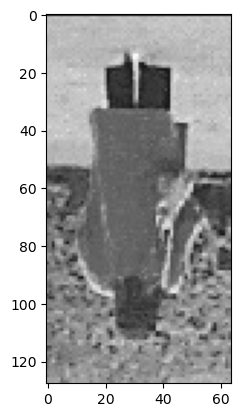

In [58]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# Read the image in grayscale
img = cv.imread('test.jpg', cv.IMREAD_GRAYSCALE)
# Get the number of rows and columns in the image
rows,cols=img.shape
vM=np.float32([[1,  0, 0],[0, -1, rows],[0,  0, 1]])
reflected_img=cv.warpPerspective(img,vM,(cols,rows))
plt.subplot(1,2,1)
plt.imshow(reflected_img,cmap='gray')
plt.show()

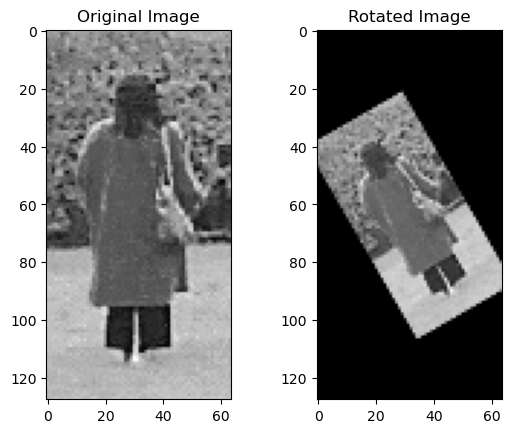

True

In [61]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)
rows, cols = img.shape

# Define the rotation matrix
M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])

# Apply the rotation
img_rotation = cv.warpAffine(img,cv.getRotationMatrix2D((cols/2, rows/2),30, 0.6),(cols, rows))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the rotated image
plt.subplot(1, 2, 2)
plt.imshow(img_rotation, cmap='gray')
plt.title('Rotated Image')

# Display the plots
plt.show()
cv.imwrite('rotation_out.jpg', img_rotation)

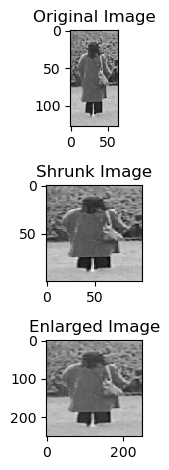

In [64]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)

# Shrink the image
img_shrinked = cv.resize(img, (100, 100), interpolation=cv.INTER_AREA)

# Enlarge the shrunken image
img_enlarged = cv.resize(img_shrinked, None, fx=2.5, fy=2.5, interpolation=cv.INTER_CUBIC)

# Plot the original image
plt.subplot(3, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the shrunk image
plt.subplot(3, 1, 2)
plt.imshow(img_shrinked, cmap='gray')
plt.title('Shrunk Image')

# Plot the enlarged image
plt.subplot(3, 1, 3)
plt.imshow(img_enlarged, cmap='gray')
plt.title('Enlarged Image')

# Display the plots
plt.tight_layout()
plt.show()


In [65]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [69]:
import pandas as pd
from sklearn.datasets import load_iris
data =pd.DataFrame(iris.data)
data.head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

In [71]:
data.columns = ['sepal length', 'sepal_width', 'petal_length', 'petal_width']
#note: it is common practice to use underscores between words, and avoid spaces
data.head()

sepal length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [79]:
target=pd.DataFrame(iris.target)
target=target.rename(columns={0:'target'})
target.head()

target
0       0
1       0
2       0
3       0
4       0

In [78]:
df=pd.concat([data,target],axis=1)
df.head()

sepal length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [80]:
df.dtypes

sepal length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
dtype: object

In [81]:
df.isnull().sum()

sepal length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [82]:
df.describe()

sepal length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

<Axes: >

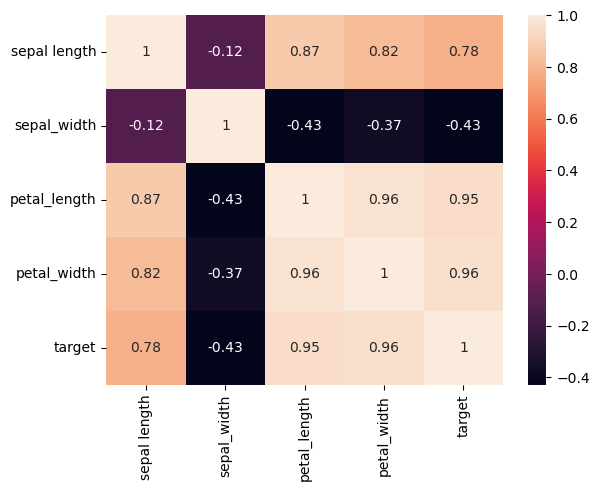

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.heatmap(df.corr(),annot=True)

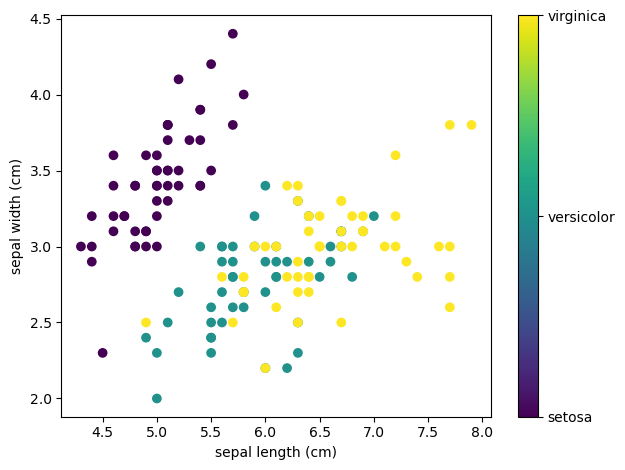

In [86]:
x_index=0
y_index=1
formatter=plt.FuncFormatter(lambda i,*args:iris.target_names[int(i)])
plt.scatter(iris.data[:,x_index],iris.data[:,y_index],c=iris.target)
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

In [87]:
 x=df.copy()
y=x.pop('target')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

NameError: name 'X_train' is not defined

In [91]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0])

In [93]:
pip install sklearn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [96]:
from bs4 import BeautifulSoup
import requests
#Fetch a website URL and store it to webpage
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")
# Check if the request was successful (status code 200)
if webpage.status_code == 200:
    # Print the content of the webpage
    print(webpage.text)
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

<!DOCTYPE html>
<html lang="en">
   <head>
      <meta charset="utf-8">
      <style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
   </head>
   <body>
      <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
      <div id="banner">
         <h1>Cacao Ratings</h1>
      </div>
      <div id="infoContainer">
         <table class="infoTable">
            <tr>
               <td>Compiled ratings of over 1700 Chocolate bars</td>
            </tr>
            <tr>
               <td>Ratings are from 1-5</td>
            </tr>
         </tabl

In [97]:
soup=BeautifulSoup(webpage.content,"html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

In [100]:
rating_column=soup.find_all(attrs={"class":"Rating"})
cocoa_percent_tags=soup.find_all(attrs={"class":"CocoaPercent"})
rating=[]
cocoa_percents=[]

In [104]:
for x in rating_column[1:]:
    rating.append(float(x.get_text()))
for td in cocoa_percent_tags[1:]:
    percent=float(td.get_text().strip('%'))
    cocoa_percents.append(percent)
data={"Rating":rating,"CococaPercentage":cocoa_percents}
df=pd.DataFrame.from_dict(data)
df

Rating  CococaPercentage
0       3.75              63.0
1       2.75              70.0
2       3.00              70.0
3       3.50              70.0
4       3.50              70.0
...      ...               ...
7175    3.75              70.0
7176    3.00              65.0
7177    3.50              65.0
7178    3.25              62.0
7179    3.00              65.0

[7180 rows x 2 columns]

In [110]:
z=np.polyfit(df.cocoa_percents,df.rating,1)
line_function=np.poly1d(z)
plt.scatter(df.cocoa_percents,df.rating)
plt.title('Coca Percentage & Ratings Correkation')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'cocoa_percents'

In [ ]:
import random

class Library:
    def __init__(self):
        self.users = {}
        self.books = {
            "Fiction": ["Hanzlah", "Harry Potter"],
            "Non-Fiction": ["Allama Iqbal", "Balay-e-Jebareel"],
            "Other": ["Hanan", "A perfect wife"]
        }

    def user(self, name, roll_number):
        if roll_number in self.users:
            print(f"Hi!, {name}!")
        else:
            print(f"Welcome, {name}!")
            self.users[roll_number] = name

    def select(self):
        print("\nCategories of the books are:")
        for category in self.books.keys():
            print(f"- {category}")
        category = input("Please select a category or type 'exit' to quit: ")
        if category.lower() == 'exit':
            return None
        if category in self.books:
            print(f"Books in '{category}' category:")
            for book in self.books[category]:
                print("- {}".format(book))
            selected_book = input("Select a book or type 'exit' to quit: ")
            if selected_book.lower() == 'exit':
                return None
            if selected_book in self.books[category]:
                print(f"The Book selected is '{selected_book}' from '{category}' category.")
                return selected_book
            else:
                print(f"Book not found in '{category}' category.")
                return None
        else:
            print("Invalid category.")
            return None

    def return_deadline(self):
        return random.randint(7, 14)
library = Library()
while True:
    print("\n===== Library Menu =====")
    print("1. Add/Update User")
    print("2. Select Book")
    print("3. Exit")
    choice = input("Enter your choice: ")        
    if choice == '1':
        name = input("Enter your name: ")
        roll_number = input("Enter your roll number: ")
        library.user(name, roll_number)
    elif choice == '2':
        selected_book = library.select()
        if selected_book:
            return_days = library.return_deadline()
            print(f"Return the '{selected_book}' in these {return_days} days.")
        elif choice == '3':
            print("Exiting program...")
            break
        else:
            print("Invalid choice. Please choose a valid option.")

In [ ]:
import random

class Library:
    def __init__(self):
        self.users = {}
        self.books = {
            "Fiction": ["Hanzlah", "Harry Potter"],
            "Non-Fiction": ["Allama Iqbal", "Balay-e-Jebareel"],
            "Other": ["Hanan", "A perfect wife"]
        }

    def user(self, name, roll_number):
        if roll_number in self.users:
            print(f"Hi!, {name}!")
        else:
            print(f"Welcome, {name}!")
            self.users[roll_number] = name

    def select(self):
        print("\nCategories of the books are:")
        for category in self.books.keys():
            print(f"- {category}")
        category = input("Please select a category or type 'exit' to quit: ")
        if category.lower() == 'exit':
            return None
        if category in self.books:
            print(f"Books in '{category}' category:")
            for book in self.books[category]:
                print("- {}".format(book))
            selected_book = input("Select a book or type 'exit' to quit: ")
            if selected_book.lower() == 'exit':
                return None
            if selected_book in self.books[category]:
                print(f"The Book selected is '{selected_book}' from '{category}' category.")
                return selected_book
            else:
                print(f"Book not found in '{category}' category.")
                return None
        else:
            print("Invalid category.")
            return None

    def return_deadline(self):
        return random.randint(7, 14)

library = Library()
while True:
    print("\n===== Library Menu =====")
    print("1. Add/Update User")
    print("2. Select Book")
    print("3. Exit")
    choice = input("Enter your choice: ")        
    if choice == '1':
        name = input("Enter your name: ")
        roll_number = input("Enter your roll number: ")
        library.user(name, roll_number)
    elif choice == '2':
        selected_book = library.select()
        if selected_book:
            return_days = library.return_deadline()
            print(f"Return the '{selected_book}' in these {return_days} days.")
    elif choice == '3':
        print("Exiting program...")
        break
    else:
        print("Invalid choice. Please choose a valid option.")


In [ ]:
import random
class Library:
    def __init__(self):
        self.users = {}
        self.books = {
            "Fiction": ["Hanzlah", "Harry Potter"],
            "Non-Fiction": ["Allama Iqbal", "Balay-e-Jebareel"],
            "Other": ["Hanan", "A perfect wife"]
        }
    def user(self, name, roll_number):
        if roll_number in self.users:
            print(f"Hi!, {name}!")
        else:
            print(f"Welcome, {name}!")
            self.users[roll_number] = name
    def select(self):
        print("\nCategories of the books are:")
        for category in self.books.keys():
            print(f"- {category}")
        category = input("Please select a category or type 'exit' to quit: ")
        if category.lower() == 'exit':
            return None
        if category in self.books:
            print(f"Books in '{category}' category:")
            for book in self.books[category]:
                print(f"Book in categories are :{book}")
            selected_book = input("Select a book or type 'bye' to quit: ")
            if selected_book.lower() == 'bye':
                return None
            if selected_book in self.books[category]:
                print(f"The Book selected is '{selected_book}' from '{category}' category.")
                return selected_book
            else:
                print(f"Book not found in '{category}' category.")
                return None
        else:
            print("Invalid category.")
            return None
    def return_deadline(self):
        return random.randint(7, 14)
def main():
    library = Library()
    while True:
        print("\n===== Library Menu =====")
        print("1. Add/Update User")
        print("2. Select Book")
        print("3. Exit")
        choice = input("Enter your choice: ")
        if choice == '1':
            name = input("Enter your name: ")
            roll_number = input("Enter your roll number: ")
            library.user(name, roll_number)
        elif choice == '2':
            selected_book = library.select()
            if selected_book:
                return_days = library.return_deadline()
                print(f"Return the '{selected_book}' in these {return_days} days.")
        elif choice == '3':
            print("Exiting program(^_^)|")
            break
        else:
            print("Invalid choice")
if __name__ == "__main__":
    main()



===== Library Menu =====
1. Add/Update User
2. Select Book
3. Exit


In [1]:
def add_vertex(v):
    global graph
    if v in graph:
        print("Vertex already in the graph")
    else:
        graph[v] = []

def add_edge(v1, v2):
    global graph
    if v1 not in graph:
        print(f"Vertex {v1} does not exist")
    elif v2 not in graph:
        print(f"Vertex {v2} does not exist")
    else:
        if v2 not in graph[v1]:
            graph[v1].append(v2)
        if v1 not in graph[v2]:
            graph[v2].append(v1)

def print_graph():
    global graph
    for vertex in graph:
        for adjacent_vertex in graph[vertex]:
            print(vertex, "-", adjacent_vertex)

if __name__ == '__main__':
    graph = {}
    add_vertex(1)
    add_vertex(2)
    add_vertex(3)
    add_vertex(4)
    add_vertex(5)
    add_vertex(6)
    add_edge(1, 2)
    add_edge(1, 5)
    add_edge(5, 4)
    add_edge(5, 2)
    add_edge(3, 4)
    add_edge(3, 2)
    add_edge(4, 6)
    print_graph()


1 - 2
1 - 5
2 - 1
2 - 5
2 - 3
3 - 4
3 - 2
4 - 5
4 - 3
4 - 6
5 - 1
5 - 4
5 - 2
6 - 4
